<a href="https://colab.research.google.com/github/MonitSharma/Xanadu-Codebook-Solutions/blob/main/Quantum_Codebook_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E1 Got Errors?


However you are reading these very words, be it on a laptop screen, phone, tablet, etc., there are algorithms and little bits of hardware, like transistors, running those algorithms working in the background to make sure that you're seeing what's intended. But what if a piece of hardware fails? What if two pieces of hardware communicate to each other over a noisy channel where their messages might get altered? Well, none of it really matters to the average person because of error correction.

Any piece of hardware is at the mercy of errors, be they quantum or classical in nature. Over several decades, we've done a good job at coming up with clever ways to co-exist with errors. That is, we live in an error-ridden world with ways to make errors irrelevant but not completely gone. In this node, we're going to look at the simplest error correction tactic: redundancy. Let's get started.

The good news is that you're already familiar with how powerful redundancy can be in real life. When humans have a hard time communicating with each other, we repeat ourselves! In the language of 1s and 0s, this means that if we want to send a bit  to someone over a communication channel that may flip the bit, , with probability , we have a better shot at making sure the receiving end gets the intended message by sending multiple copies of  over the channel. Such a channel is commonly referred to as a binary symmetric channel (BSC) and is illustrated like the figure below.

![](https://codebook.xanadu.ai/images/binary_symmetric_channel.png)

### Codercise E.1.1.
In this exercise, you are given a function called encode that creates three copies of a bit : . Create a function called noisy_channel that flips each bit  with an equal and independent probability . For example, if the repeated bit string is , then the flipped bit string could be, say, , where only the first bit was flipped and the other two are safe. This is going to be the message that Bob receives from Alice.

You have numpy — imported as np in the code — to use.

In [1]:
import numpy as np

In [2]:

def encode(b):
    """Returns three copies of Alice's bit b."""
    return [b, b, b]

def noisy_channel(b, p):
    """Returns a three-bit codeword message that Bob receives through a noisy channel."""
    alice_sends = encode(b)  # Alice sends this to Bob

    # Create an empty list to store the noisy codeword
    noisy_codeword = []

    # Iterate through each bit in the alice_sends list
    for bit in alice_sends:
        # Generate a random number between 0 and 1
        random_prob = np.random.random()

        # Check if the random number is less than the probability p
        # If yes, flip the bit by subtracting it from 1
        if random_prob < p:
            noisy_bit = 1 - bit
        else:
            noisy_bit = bit

        # Append the noisy bit to the noisy_codeword list
        noisy_codeword.append(noisy_bit)

    return noisy_codeword

# Test the noisy_channel function
bit_to_send = 0
flip_probability = 0.1  # Probability of flipping a bit

noisy_codeword = noisy_channel(bit_to_send, flip_probability)
print("Noisy Codeword:", noisy_codeword)


Noisy Codeword: [0, 0, 0]


Nice work! So, Alice encodes the bit  as  and sends it through the noisy channel. Bob is on the other end and gets a three-bit string that may or may not resemble Alice's message. The instruction that Alice gives Bob to decode her message is to take the majority value of the three bits as the original message. For example, if Bob receives , he deduces that Alice was trying to send him  since that's the majority bit value. This begs the question: what are the chances that Bob actually gets it right?

![](https://codebook.xanadu.ai/images/three_bit_repetition_code.png)

## Codercise E.1.2.

Given the original bit  that Alice sends and what Bob receives (bob_receives) from the noisy_channel, you must determine whether or not Bob's decoding procedure is successful. Complete two functions:

decode: the procedure that Bob executes to deduce Alice's original message.
success: does Bob's prediction from the decoding procedure match Alice's bit?


In [3]:
def decode(codeword):
    """Executes Bob's decoding procedure."""
    # Count the number of zeros and ones in the codeword
    count_zeros = codeword.count(0)
    count_ones = codeword.count(1)

    # Return the majority vote (the bit that appears more times)
    return 0 if count_zeros >= count_ones else 1

def success(b, codeword):
    """Determines if Bob's decoding procedure is successful."""
    # Get Bob's guess from the decoding procedure
    bob_guess = decode(codeword)

    # Compare Bob's guess with Alice's original bit
    return bob_guess == b

# Test the decode and success functions
alice_bit = 0
noisy_codeword = [0, 1, 0]  # Example noisy codeword

bob_guess = decode(noisy_codeword)
is_successful = success(alice_bit, noisy_codeword)

print("Bob's Guess:", bob_guess)
print("Decoding Successful?", is_successful)


Bob's Guess: 0
Decoding Successful? True


But what are the chances that Bob actually gets it right in general? There is an analytic answer to that question:


$$ p_{success} = (1-p)^2 (2p+1)$$


Let's see the plot:

### Codercise E.1.3.

Let's get Alice to send  through the noisy_channel a bunch of times — say, 1000 times. Then, we'll ask Bob to see if he can recover the message with the success function and, finally, we will average the result for various values of . In this way, we can map out how successful Bob's decoding procedure is in general.

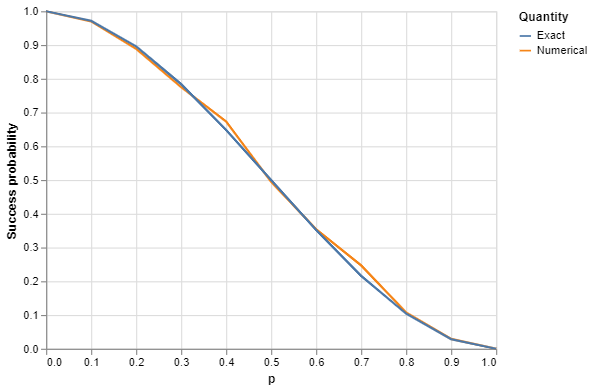